In [2]:
import cvxpy as cp
import numpy as np
import networkx as nx
import scipy as sp

from scipy.sparse.csgraph import floyd_warshall
from scipy.sparse import csr_matrix, csc_matrix

import os
from functools import partial
import json

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from gerrychain import (
    Election,
    Graph,
    MarkovChain,
    Partition,
    accept,
    constraints,
    updaters,
)

from gerrychain.metrics import efficiency_gap, mean_median, partisan_gini
from gerrychain.proposals import recom
from gerrychain.updaters import cut_edges
from gerrychain.tree import recursive_tree_part

In [193]:
# graph_path = "./georgia.json"
# graph = Graph.from_json(graph_path)
# with open (graph_path, "r") as myfile:
#     data=myfile.readlines()
# graph_dict = json.loads(data[0])

In [ ]:
populations = [a, b, c, d]
weights = [w1, w2, w3, w4, w5, w6]

In [4]:
graph = nx.complete_graph(4)

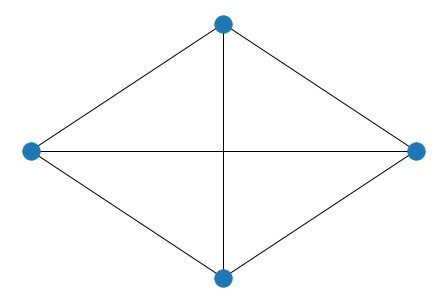

In [6]:
nx.draw_kamada_kawai(graph)

In [16]:
nx.convert_node_labels_to_integers(graph)

In [17]:
print(list(graph.nodes))
print(list(graph.edges))

[0, 1, 2, 3]
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


In [18]:
for n in graph.nodes:
    

{}

In [202]:
x = [0 for i in range(len(graph.nodes()))]
y = [0 for i in range(len(graph.nodes()))]

for node in graph.nodes(data=True):
    if node[1]["district"] == 4:
        x[node[0]] = 1
    if node[1]["district"] == 5:
        y[node[0]] = 1

In [215]:
x = np.divide(np.array(x), np.sum(x))
y = np.divide(np.array(y), np.sum(y))

x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))

In [222]:
P = nx.incidence_matrix(graph, oriented=True)

J = cp.Variable((len(graph.edges),1))

constraints = [P @ J == x-y]

objective = cp.Minimize(cp.sum(cp.abs(J)))

prob = cp.Problem(objective, constraints)
prob.solve(verbose=False, solver="ECOS")
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", J.value)

status: optimal
optimal value 3.2675587820703424
optimal var [[ 5.44258354e-14]
 [ 8.45808730e-14]
 [-4.07169216e-13]
 ...
 [ 5.95252491e-13]
 [-9.58427222e-13]
 [ 1.07658486e-12]]


In [ ]:
# Given x and y, two n-length vectors that add to 1,
# where n is the number of nodes in our dual graph.

x = (0,0,0.5,0.5)
y = (1,0,0,0)

x = np.array(x)
y = np.array(y)

x = np.reshape(x,(len(x),1))
y = np.reshape(y,(len(y),1))

T = cp.Variable((4,4))

col_sums = cp.sum(T, axis=0) # Should have size (n,)
row_sums = cp.sum(T, axis=1) # Should have size (n,)

constraints = [T >= 0]

for i in range(len(x)):
    constraints.append(row_sums[i] == x[i])
    constraints.append(col_sums[i] == y[i])

objective = cp.Minimize(cvxpy.sum(cvxpy.multiply(T,dist_matrix)))

prob = cp.Problem(objective, constraints)
prob.solve(verbose=False, solver="ECOS")
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", T.value)